In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading data:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

# Investigating the data:

In [5]:
# Findings: we want to predict the SalesPrice of homes based on high corr features.
# this is linear regression problem because we are predicting continous value.
# We have X_train, X_test, y_train only. y_test don't exist they have it for evaluation.

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#Investigating data, "train" csv file:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [8]:
#Investigating data, "test" csv file:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [9]:
#checking the shapes of our data:
print('Train shape = ' + str(df_train.shape) + '\nTest shape = ' + str(df_test.shape))#

Train shape = (1460, 81)
Test shape = (1459, 80)


In [10]:
#The SalePrice not included in test:

for ttest in df_train.columns:
    if ttest not in df_test.columns:
        print(ttest)
        
len(df_test.columns), len(df_train.columns)

SalePrice


(80, 81)

In [11]:
#Check for nulls:   Alley
# train.info()
# test.info()

### Data sets contents:

**train:** 
- Has (1460 rows) & (81 columns).
- Of which 19 contain null values.
- extra column "SalePrice(y)"

**test:** 
- Has (1459 rows) & (80 columns).
- Of which 19 contain null values.
- Of which 33 contain null values.



# Cleaning data:

In [12]:
#Check nulls:

null_col = df_train.columns[df_train.isna().any()].tolist()
# for col in null_col:
#     print("")
#     print("Column name : {} \n \
#            Number of null : {} \n \
#            Unique values: {} ".format(col, df_train[col].isna().sum(), df_train[col].value_counts().sum()))

In [13]:
#Replacing missing objects with NA, and floats with 0:

null_col = df_train.columns[df_train.isna().any()].tolist()

for col in null_col:
    if df_train[col].dtype == "float64":
        df_train[col].fillna(value=0, inplace=True)
    if df_train[col].dtype == "object":
        df_train[col].fillna(value="NA", inplace=True)
#     print("Column name : {} \n \
#            Number of null : {} \n \
#            Unique values: {} \n \
#            Dtypes: {}".format(col, train[col].isna().sum(), train[col].value_counts().sum(), train[col].dtype))

In [14]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [15]:
# plt.scatter(df_train.SalePrice)

In [16]:
#Check nulls again:

null_col = df_train.columns[df_train.isna().any()].tolist()
for col in null_col:
    print("Column name : {} \n \
           Number of null : {} \n \
           Unique values: {} ".format(col, df_train[col].isna().sum(), df_train[col].value_counts().sum()))

In [17]:
#checking the highest correlation with target(y):
train_dummies = pd.get_dummies(df_train)
high_corr = [train_dummies.corr()["SalePrice"] > 0.5] or [train_dummies.corr()["SalePrice"] < -0.5]
# list(elem for elem in high_corr if elem == True)
df_ = pd.DataFrame(high_corr)
Trues = []
# for col in df_.columns:
#     if df_[col].values == True:
#         print(col)


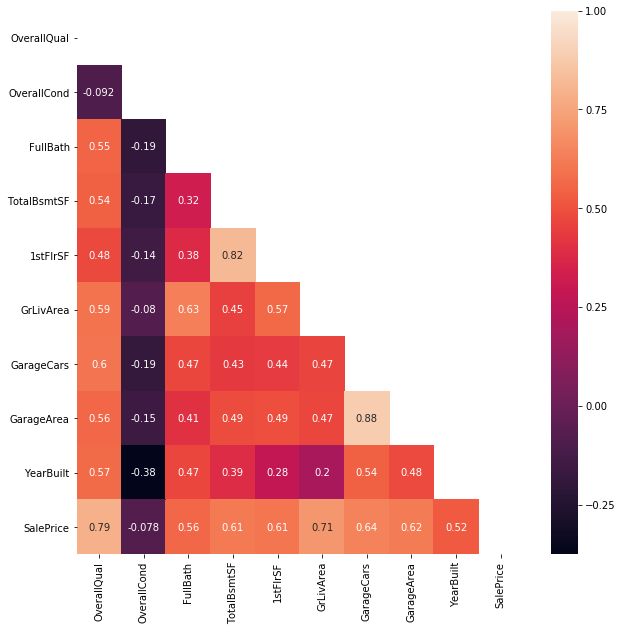

In [19]:
corr_col = df_train[['OverallQual','OverallCond', 'FullBath','TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea','YearBuilt', 'SalePrice']]
train_corr = corr_col.corr()
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_corr, annot=True, mask=mask)

## Let's visualize it (scatter plot)

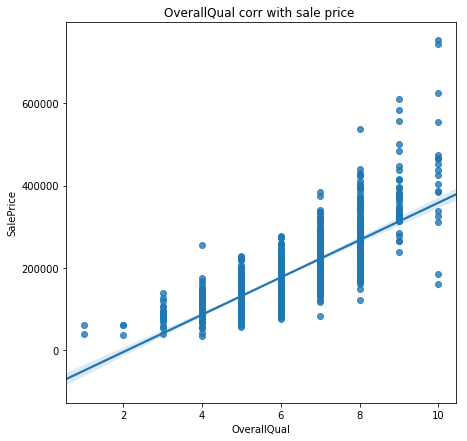

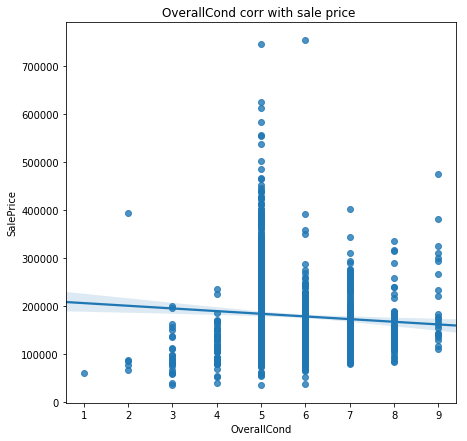

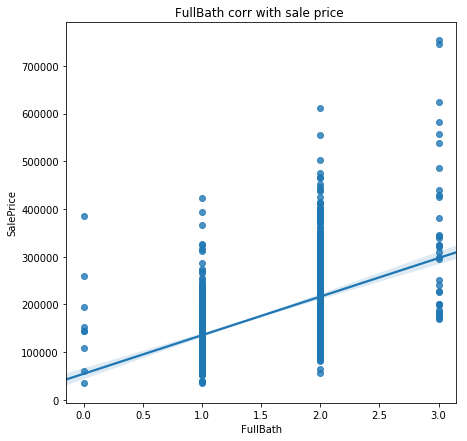

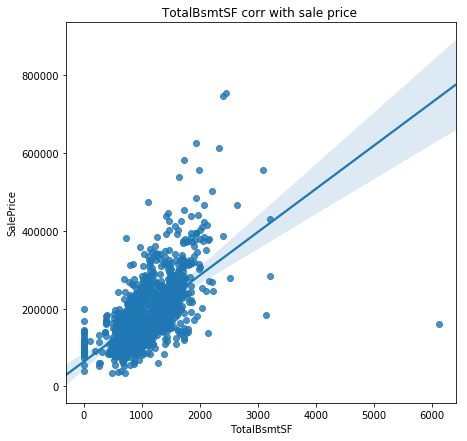

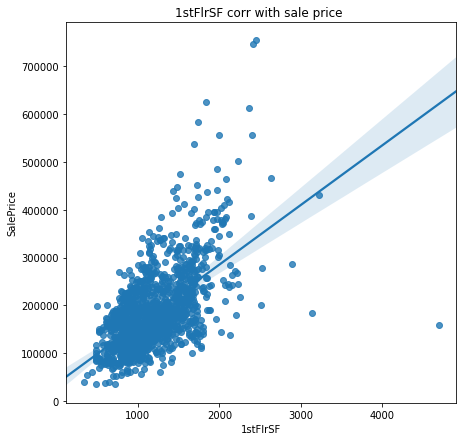

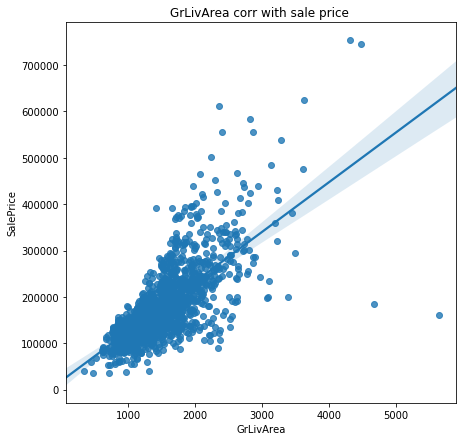

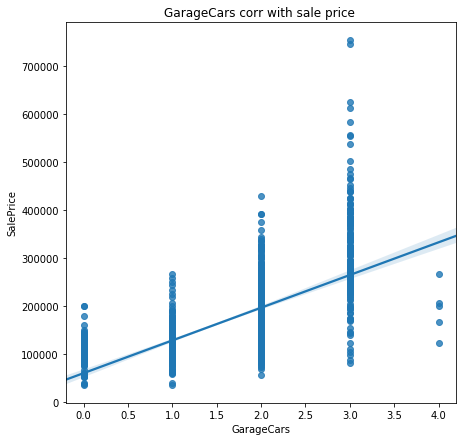

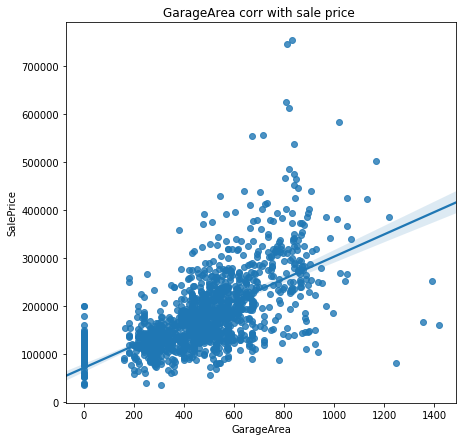

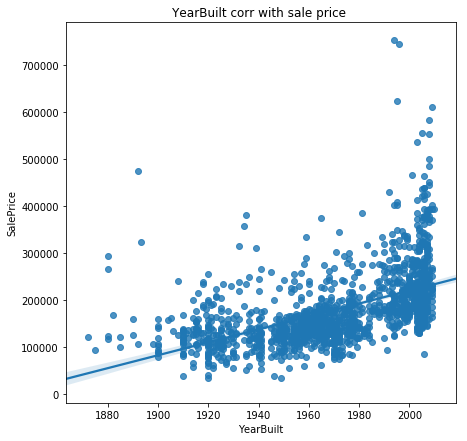

In [21]:
high_corr_col = ['OverallQual','OverallCond', 'FullBath','TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea','YearBuilt']


for col in high_corr_col:
    plt.figure(figsize=(7,7))
    sns.regplot(df_train[col].values ,df_train['SalePrice'].values)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title("{} corr with sale price ".format(col))
    plt.show()
    

In [ ]:
var = 'OverallQual' #, OverallCond, FullBath, GarageArea

data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# Feature engineering

### deleting points which are too olutlier from the crowed


In [41]:
# ,'TotalBsmtSF','1stFlrSF'. 'GrLivArea'
df_train.sort_values(by = 'GrLivArea', ascending = False).head()['GrLivArea']
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)
df_train = df_train.drop(df_train[df_train['Id'] == 1183].index) # outlier in GrLivArea
len(df_train)


1457

In [42]:
df_train["SimplOverallQual"] = df_train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df_train["SimplOverallCond"] = df_train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]

In [43]:
# df_train.Neighborhood.value_counts()
# df_train[df_train['Neighborhood'] == 'NAmes']['SalePrice']

In [44]:
## seems that most of the data are not normally distributed, we will rescale them to have the same scale to let y have meaning
# when all betas are 0, also to see the coefficents after that and compare between them, (β1=.6, and β2=.3) then B1 is more important
# than b2 twice.

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print(len(df_out))
    return df_out

In [47]:
ss = StandardScaler()

X = df_train[['OverallQual','OverallCond', 'FullBath','TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea', 'YearBuilt','OverallGrade']] # YearBuilt

Xstd = ss.fit_transform(X)

/home/abdulmalik0x/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/abdulmalik0x/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Modeling part

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
X = df_train[['OverallQual','OverallCond', 'FullBath','TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea','YearBuilt']]
y = df_train[['SalePrice']]


ss = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=4) # stratify=y, 


X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/home/abdulmalik0x/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/abdulmalik0x/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/abdulmalik0x/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [50]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
y_pred = lr.predict(X_train)

0.8332743325990909


In [51]:
# Setting baseline on mean to compare with predicted mean

print(y_pred.mean())
print(y_train.mean())


180393.71416309013
SalePrice    180393.714163
dtype: float64


In [52]:
from sklearn.metrics import mean_squared_error

def rsme(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())# np.sqrt(mean_squared_error(predicted , actual))

In [53]:

lr.fit(Xstd, y)
prediction = lr.predict(Xstd)
rsme(prediction, y)
cross_val_score(lr, Xstd, y).mean()

/home/abdulmalik0x/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8203924282292521

## Validation using k-fold

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer

predictions = cross_val_predict(lr, Xstd, y, cv=10)
len(X), len(y), len(predictions)

# y.sort_values('SalePrice', ascending=False)

(1460, 1460, 1460)

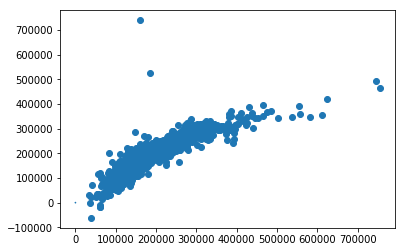

In [40]:
point_1 = [10, 50]
plt.plot(point_1, point_1)
plt.scatter(y, predictions)
plt.show()

In [ ]:
metrics.r2_score(y, predictions)

In [ ]:


X = df_train[['OverallQual','OverallCond', 'FullBath','TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea','YearBuilt', "Fireplaces", "LotArea"]].dropna() # OverallCond, 

kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lr, X, y, cv=kf)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

In [ ]:
lr.fit(Xstd, y)
np.sqrt(mean_squared_error(y, predictions))

In [ ]:
# Make cross validated predictions on the test sets
predictions_shuffled = cross_val_predict(lr, X, y, cv=kf)

point_1 = [10, 50]
plt.plot(point_1, point_1, 'k')
plt.scatter(y, predictions, c='b', alpha=0.5, label='without shuffling')
plt.scatter(y, predictions_shuffled, c='r', alpha=0.5, label='with shuffling')
plt.xlabel('true y')
plt.ylabel('predicted y')
plt.legend()
plt.show()

## Predict on df_test

In [55]:
X_test = df_test[['OverallQual','OverallCond', 'FullBath','TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea', 'YearBuilt']] # YearBuilt

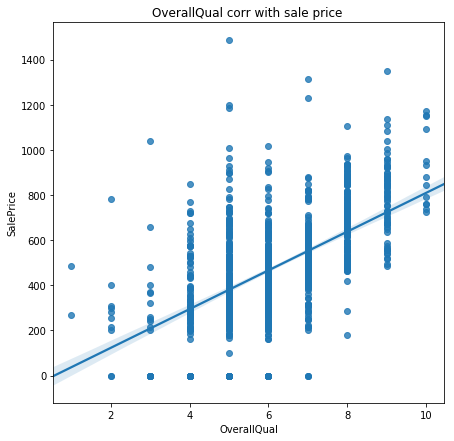

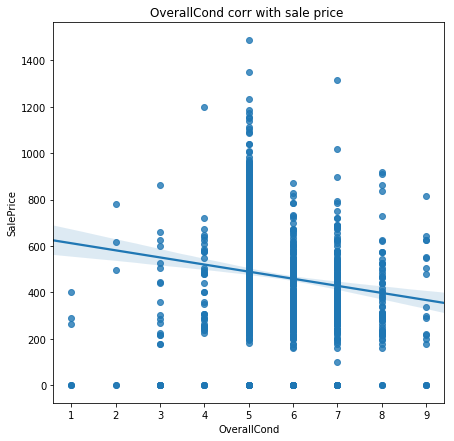

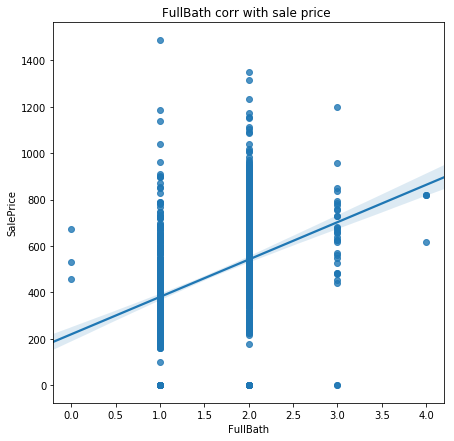

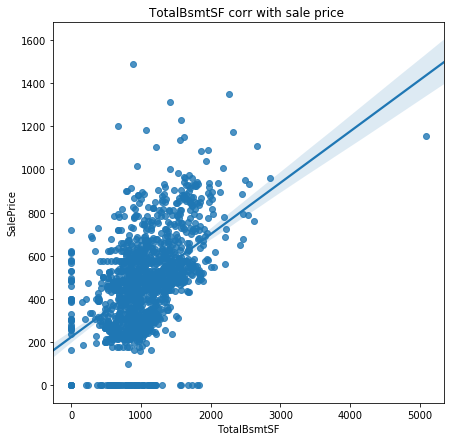

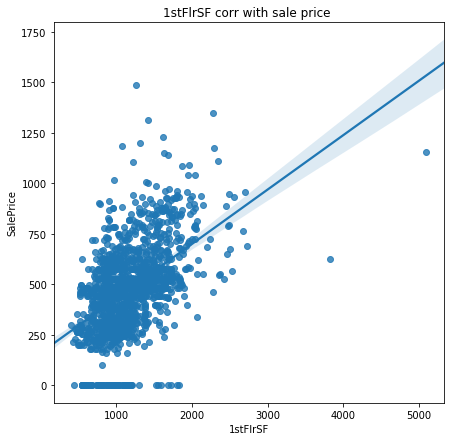

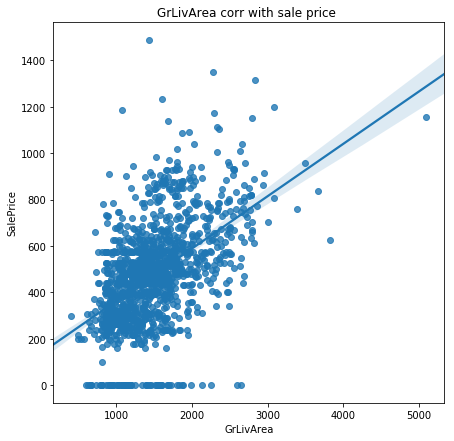

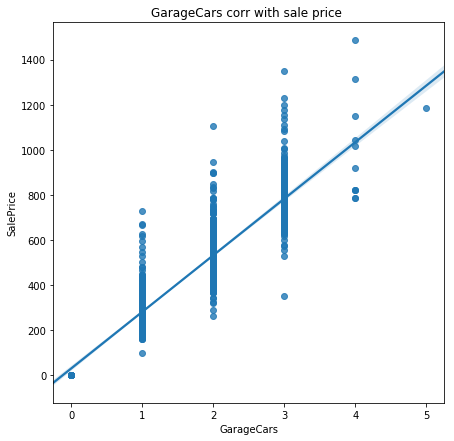

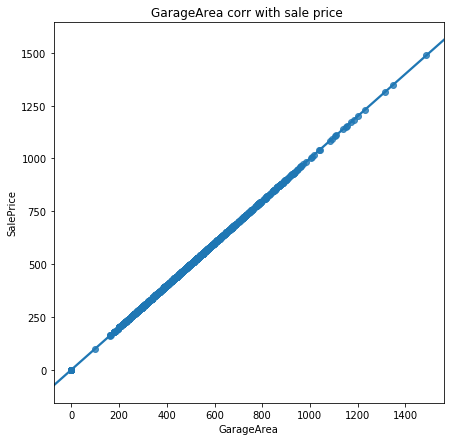

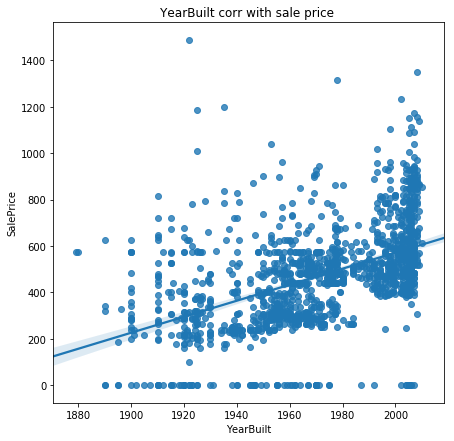

In [56]:


for col in X_test:
    plt.figure(figsize=(7,7))
    sns.regplot(X_test[col].values ,X_test['GarageArea'].values)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title("{} corr with sale price ".format(col))
    plt.show()

In [69]:
X_test.sort_values('1stFlrSF', ascending=False).head()

# override found outliers
X_test.loc[X_test['GrLivArea'] == 5095, 'GrLivArea'] = 2300 # '1stFlrSF', 'GrLivArea'
X_test.loc[X_test['1stFlrSF'] == 5095, '1stFlrSF'] = 2230
X_test.loc[X_test['TotalBsmtSF'] == 5095.0, 'TotalBsmtSF'] = 2552
X_test.loc[X_test['1stFlrSF'] == 3820, '1stFlrSF'] = 2300 # '1stFlrSF', 'GrLivArea'
X_test.loc[X_test['GrLivArea'] == 3820, 'GrLivArea'] = 2230


X_test["SimplOverallQual"] = X_test.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
X_test["SimplOverallCond"] = X_test.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

X_test["OverallGrade"] = X_test["OverallQual"] * X_test["OverallCond"]

X_test = X_test[['OverallQual','OverallCond', 'FullBath','TotalBsmtSF','1stFlrSF', 'GrLivArea',\
                  'GarageCars', 'GarageArea','YearBuilt','OverallGrade']]


In [70]:
# Delete outliers

X_test.loc[:, "GarageArea"] = X_test.loc[:, "GarageArea"].fillna(0)
X_test.loc[:, "GarageCars"] = X_test.loc[:, "GarageCars"].fillna(0)
X_test.loc[:, "TotalBsmtSF"] = X_test.loc[:, "TotalBsmtSF"].fillna(0)
y.loc[y.SalePrice == 755000, 'SalePrice'] = 403000



# X_test.isna().sum()
X_test_std = ss.fit_transform(X_test.values)
lr.fit(Xstd, np.log(y))
df_submission['SalePrice'] = np.exp(lr.predict(X_test_std))

df_submission.to_csv('to_submit.csv')


/home/abdulmalik0x/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/abdulmalik0x/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
from scipy.stats import norm
from scipy import stats
# df_train['SalePrice'] = np.log(df_train['SalePrice'])

df_train.SalePrice = ss.fit_transform(df_train[['SalePrice']].values)
sns.distplot(df_train.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(df_train.SalePrice, plot=plt)

# Ridge

In [71]:
from sklearn.linear_model import Ridge

In [76]:
list_models = []
list_coef = []
list_test_score = []
list_train_score = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True, random_state=4) # stratify=y, 

for i in np.linspace(0, 30, 50):
    ridge_reg = Ridge(normalize=True)
    ridge_reg.set_params(alpha=i)
    ridge_reg.fit(X_train, y_train)
    list_models.append(ridge_reg)
    ridge_reg.predict(X_test)
    list_coef.append(ridge_reg.coef_)
#     print("Train rmse rate: {}".format(np.sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train)))))
#     print("Test rmse rate: {}".format(np.sqrt(mean_squared_error(y_test, ridge_reg.predict(X_test)))))
    list_train_score.append(np.sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train))))
    list_test_score.append(np.sqrt(mean_squared_error(y_test, ridge_reg.predict(X_test))))



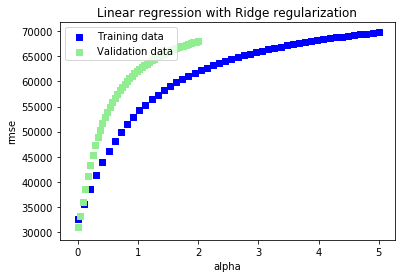

In [77]:
# Plot residuals
# plt.scatter(np.linspace(0, 1, 20), list_train_score[1] - y_train, c = "blue", marker = "s", label = "Training data")
# plt.scatter(np.linspace(0, 1, 20), list_test_score[1] - y_test, c = "lightgreen", marker = "s", label = "Validation data")
# plt.title("Linear regression with Ridge regularization")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
# plt.show()

# Plot predictions
import seaborn as sns
plt.scatter(np.linspace(0, 5, 50), list_train_score, c = "blue", marker = "s", label = "Training data")
plt.scatter(np.linspace(0, 2, 50), list_test_score, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.legend(loc = "upper left")
# plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()
